In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_city_target_passenger_rating = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\city_target_passenger_rating.csv")
df_dim_city = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\dim_city.csv")
df_dim_date = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\dim_date.csv")
df_reapeat_trip_distribution = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\dim_repeat_trip_distribution.csv")
df_fact_passenger_summary = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\fact_passenger_summary.csv")
df_fact_trips = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\fact_trips.csv")
df_monthly_target_new_passengers = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\monthly_target_new_passengers.csv")
df_monthly_target_trips = pd.read_csv(r"C:\Users\Pinki\Downloads\RPC13_Input_For_Participants\RPC13_Input_For_Participants\datasets\csv_files\monthly_target_trips.csv")

In [3]:
df_reapeat_trip_distribution.head()

,month,city_id,trip_count,repeat_passenger_count
0,2024-01-01,AP01,10-Trips,7
1,2024-01-01,AP01,2-Trips,352
2,2024-01-01,AP01,3-Trips,158
3,2024-01-01,AP01,4-Trips,53
4,2024-01-01,AP01,5-Trips,38


In [4]:
df_reapeat_trip_distribution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   month                   540 non-null    object
 1   city_id                 540 non-null    object
 2   trip_count              540 non-null    object
 3   repeat_passenger_count  540 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 17.0+ KB


In [5]:
df_reapeat_trip_distribution['trip_count'] = df_reapeat_trip_distribution['trip_count'].str.extract('(\d+)') 

In [6]:
df_reapeat_trip_distribution['trip_count'] = pd.to_numeric(df_reapeat_trip_distribution['trip_count'], errors='coerce')

In [7]:
df_reapeat_trip_distribution['TotalCount'] = df_reapeat_trip_distribution['trip_count'] + df_reapeat_trip_distribution['repeat_passenger_count']

In [8]:
df_reapeat_trip_distribution.head()


,month,city_id,trip_count,repeat_passenger_count,TotalCount
0,2024-01-01,AP01,10,7,17
1,2024-01-01,AP01,2,352,354
2,2024-01-01,AP01,3,158,161
3,2024-01-01,AP01,4,53,57
4,2024-01-01,AP01,5,38,43


In [9]:
merged_df = pd.merge(df_reapeat_trip_distribution, df_dim_city, on='city_id')

In [10]:
merged_df.head()

,month,city_id,trip_count,repeat_passenger_count,TotalCount,city_name
0,2024-01-01,AP01,10,7,17,Visakhapatnam
1,2024-01-01,AP01,2,352,354,Visakhapatnam
2,2024-01-01,AP01,3,158,161,Visakhapatnam
3,2024-01-01,AP01,4,53,57,Visakhapatnam
4,2024-01-01,AP01,5,38,43,Visakhapatnam


# Top 3 and bottom 3 cities by total trips

In [11]:
top_3_cities = merged_df.nlargest(3, 'TotalCount')

In [12]:
print("Top 3 Cities by Total Count:")
print(top_3_cities)

Top 3 Cities by Total Count:
          month city_id  trip_count  repeat_passenger_count  TotalCount  \
388  2024-02-01    RJ01           2                     999        1001   
406  2024-04-01    RJ01           2                     991         993   
307  2024-05-01    KL01           2                     971         973   

    city_name  
388    Jaipur  
406    Jaipur  
307     Kochi  


In [13]:
bottom_3_cities = merged_df.nsmallest(3, 'TotalCount')

In [14]:
print("Bottom 3 Cities by Total Count:")
print(bottom_3_cities)

Bottom 3 Cities by Total Count:
          month city_id  trip_count  repeat_passenger_count  TotalCount  \
222  2024-01-01    KA01           7                       2           9   
224  2024-01-01    KA01           9                       0           9   
249  2024-04-01    KA01           7                       2           9   

    city_name  
222    Mysore  
224    Mysore  
249    Mysore  


In [15]:
df_fact_trips.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5
1,TRPVAD240129a3b6dba8,2024-01-29,GJ02,repeated,7,74,5,5
2,TRPCOI240107a42430fb,2024-01-07,TN01,repeated,11,155,8,8
3,TRPKOC240325d7601389,2024-03-25,KL01,repeated,36,427,9,10
4,TRPVIS2406027be97166,2024-06-02,AP01,new,17,265,8,8


In [16]:
df_fact_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425903 entries, 0 to 425902
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trip_id                 425903 non-null  object
 1   date                    425903 non-null  object
 2   city_id                 425903 non-null  object
 3   passenger_type          425903 non-null  object
 4   distance_travelled(km)  425903 non-null  int64 
 5   fare_amount             425903 non-null  int64 
 6   passenger_rating        425903 non-null  int64 
 7   driver_rating           425903 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 26.0+ MB


In [17]:
merged_df1 = pd.merge(df_fact_trips, df_dim_city, on='city_id')

In [18]:
merged_df1.head()

,trip_id,date,city_id,passenger_type,distance_travelled(km),fare_amount,passenger_rating,driver_rating,city_name
0,TRPLUC240113d55de2fb,2024-01-13,UP01,repeated,11,158,5,5,Lucknow
1,TRPLUC240327a61cfe66,2024-03-27,UP01,new,5,71,7,8,Lucknow
2,TRPLUC240322c73f8439,2024-03-22,UP01,repeated,15,161,6,7,Lucknow
3,TRPLUC240420c114cb02,2024-04-20,UP01,repeated,13,182,7,5,Lucknow
4,TRPLUC2405094011dfa0,2024-05-09,UP01,repeated,18,188,6,5,Lucknow


# Average fare per trip by city

In [19]:
city_metrics = merged_df1.groupby('city_name').agg(
    average_fare_per_trip=('fare_amount', 'mean'),
    average_distance=('distance_travelled(km)', 'mean'),
    total_trips=('fare_amount', 'count')  # Optional: Count trips for each city
).reset_index()

In [20]:
print(city_metrics)

       city_name  average_fare_per_trip  average_distance  total_trips
0     Chandigarh             283.686950         23.518714        38981
1     Coimbatore             166.982183         14.979198        21104
2         Indore             179.838609         16.502473        42456
3         Jaipur             483.918128         30.023125        76888
4          Kochi             335.245079         24.065461        50702
5        Lucknow             147.180376         12.512963        64299
6         Mysore             249.707168         16.496921        16238
7          Surat             117.272925         10.997247        54843
8       Vadodara             118.566165         11.517736        32026
9  Visakhapatnam             282.672284         22.553938        28366


In [21]:
highest_fare_city = city_metrics.nlargest(1, 'average_fare_per_trip')

In [22]:
print(highest_fare_city)

  city_name  average_fare_per_trip  average_distance  total_trips
3    Jaipur             483.918128         30.023125        76888


In [23]:
lowest_fare_city = city_metrics.nsmallest(1, 'average_fare_per_trip')

In [24]:
print(lowest_fare_city)

  city_name  average_fare_per_trip  average_distance  total_trips
7     Surat             117.272925         10.997247        54843


# Average ratings by city and passenger type

In [25]:
rating_metrics = merged_df1.groupby(['city_name', 'city_id', 'passenger_type']).agg(
    passenger_avg_rating=('passenger_rating', 'mean'),
    driver_avg_rating=('driver_rating', 'mean')
).reset_index()

In [262]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)   

In [263]:
print(rating_metrics)

        city_name city_id passenger_type  passenger_avg_rating  driver_avg_rating
0      Chandigarh    CH01            new              8.489158           7.992120
1      Chandigarh    CH01       repeated              7.493798           7.472824
2      Coimbatore    TN01            new              8.485788           7.990604
3      Coimbatore    TN01       repeated              7.475457           7.480778
4          Indore    MP01            new              8.485837           7.970800
5          Indore    MP01       repeated              7.473961           7.477404
6          Jaipur    RJ01            new              8.985018           8.988246
7          Jaipur    RJ01       repeated              7.991042           8.984790
8           Kochi    KL01            new              8.987394           8.985350
9           Kochi    KL01       repeated              8.003665           8.989830
10        Lucknow    UP01            new              7.977429           6.990406
11        Luckno

In [27]:
highest_average_passenger_rating_city = rating_metrics.nlargest(1, 'passenger_avg_rating')

In [28]:
highest_average_driver_rating_city = rating_metrics.nlargest(1, 'driver_avg_rating')

In [29]:
print(highest_average_passenger_rating_city)

  city_name city_id passenger_type  passenger_avg_rating  driver_avg_rating
8     Kochi    KL01            new              8.987394            8.98535


In [30]:
print(highest_average_driver_rating_city)

        city_name city_id passenger_type  passenger_avg_rating  \
19  Visakhapatnam    AP01       repeated              7.989628   

    driver_avg_rating  
19           8.992701  


In [31]:
lowest_average_passenger_rating_city = rating_metrics.nsmallest(1, 'passenger_avg_rating')

In [32]:
lowest_average_driver_rating_city = rating_metrics.nsmallest(1, 'driver_avg_rating')

In [33]:
print(lowest_average_passenger_rating_city)

   city_name city_id passenger_type  passenger_avg_rating  driver_avg_rating
17  Vadodara    GJ02       repeated              5.978629           6.481072


In [34]:
print(lowest_average_driver_rating_city)

   city_name city_id passenger_type  passenger_avg_rating  driver_avg_rating
15     Surat    GJ01       repeated              5.995511           6.479441


# Peak and low demand Months by city

In [35]:
merged_df['month'] = pd.to_datetime(merged_df['month'])

In [36]:
merged_df['month_number'] = merged_df['month'].dt.month

In [37]:
merged_df['month_name'] = merged_df['month'].dt.strftime('%B')

In [38]:
demand_metrics = merged_df.groupby(['city_name', 'city_id', 'month_name']).agg(
    month_highest_total_trip=('TotalCount', 'max'),
   month_lowest_total_trip=('TotalCount', 'min')
).reset_index()

In [260]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)   

In [261]:
print(demand_metrics)

        city_name city_id month_name  month_highest_total_trip  month_lowest_total_trip
0      Chandigarh    CH01      April                       257                       19
1      Chandigarh    CH01   February                       298                       23
2      Chandigarh    CH01    January                       198                       23
3      Chandigarh    CH01       June                       222                       28
4      Chandigarh    CH01      March                       335                       29
5      Chandigarh    CH01        May                       340                       25
6      Coimbatore    TN01      April                        94                       22
7      Coimbatore    TN01   February                        71                       13
8      Coimbatore    TN01    January                       102                       11
9      Coimbatore    TN01       June                        91                       15
10     Coimbatore    TN01      M

# Weekend vs weekday trip demand by city

In [40]:
df_dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            182 non-null    object
 1   start_of_month  182 non-null    object
 2   month_name      182 non-null    object
 3   day_type        182 non-null    object
dtypes: object(4)
memory usage: 5.8+ KB


In [41]:
merged_df2 = pd.merge(merged_df , df_dim_date, on='month_name')

In [42]:
merged_df2.head()

,month,city_id,trip_count,repeat_passenger_count,TotalCount,city_name,month_number,month_name,date,start_of_month,day_type
0,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,2024-01-01,2024-01-01,Weekday
1,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,2024-01-02,2024-01-01,Weekday
2,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,2024-01-03,2024-01-01,Weekday
3,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,2024-01-04,2024-01-01,Weekday
4,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,2024-01-05,2024-01-01,Weekday


In [43]:
print(merged_df2['day_type'].unique())

['Weekday' 'Weekend']


In [44]:
start_date = '2024-01-01'
end_date = '2024-06-30'
filtered_df = merged_df2[(merged_df2['date'] >= start_date) & (merged_df2['date'] <= end_date)]

In [45]:
demand_metrics1 = filtered_df.groupby(['city_name', 'city_id', 'day_type','month_name']).agg(
    highest_total_trip=('TotalCount', 'max'),
   lowest_total_trip=('TotalCount', 'min')
).reset_index()

In [269]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)   

In [270]:
print(demand_metrics1.head(10))

    city_name city_id day_type month_name  highest_total_trip  lowest_total_trip
0  Chandigarh    CH01  Weekday      April                 257                 19
1  Chandigarh    CH01  Weekday   February                 298                 23
2  Chandigarh    CH01  Weekday    January                 198                 23
3  Chandigarh    CH01  Weekday       June                 222                 28
4  Chandigarh    CH01  Weekday      March                 335                 29
5  Chandigarh    CH01  Weekday        May                 340                 25
6  Chandigarh    CH01  Weekend      April                 257                 19
7  Chandigarh    CH01  Weekend   February                 298                 23
8  Chandigarh    CH01  Weekend    January                 198                 23
9  Chandigarh    CH01  Weekend       June                 222                 28


In [47]:
day_type_metrics = merged_df2.groupby('day_type').agg(
    total_trips=('TotalCount', 'sum')
).reset_index()

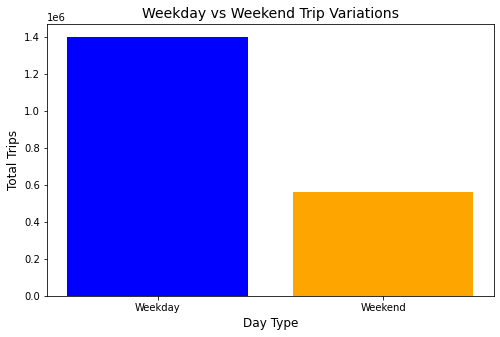

In [48]:
plt.figure(figsize=(8, 5))
plt.bar(day_type_metrics['day_type'], day_type_metrics['total_trips'], color=['blue', 'orange'])
plt.xlabel('Day Type', fontsize=12)
plt.ylabel('Total Trips', fontsize=12)
plt.title('Weekday vs Weekend Trip Variations', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Repeat passenger frequency and city contribution analysis

In [77]:
valuewise_analysis = merged_df.groupby(["city_name","city_id" ,"trip_count"]).agg(
    total_trips=("trip_count", "sum"),
    repeat_passenger_trips=("repeat_passenger_count", "sum")
).reset_index()


In [82]:
valuewise_analysis["repeat_passenger_trips_percentage"] = (
    valuewise_analysis["repeat_passenger_trips"] / valuewise_analysis["total_trips"] * 100
)


In [83]:
valuewise_analysis = valuewise_analysis.sort_values(
    by="repeat_passenger_trips_percentage", ascending=False
).reset_index(drop=True)

In [85]:
valuewise_analysis["repeat_passenger_trips_percentage"] = valuewise_analysis[
    "repeat_passenger_trips_percentage"
].apply(lambda x: f"{x:.2f}%")

In [267]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)   

In [268]:
print(valuewise_analysis.head(20))

        city_name city_id  trip_count  total_trips  repeat_passenger_trips repeat_passenger_trips_percentage
0          Jaipur    RJ01           2           12                    4855                         40458.33%
1           Kochi    KL01           2           12                    3635                         30291.67%
2   Visakhapatnam    AP01           2           12                    2618                         21816.67%
3          Indore    MP01           2           12                    2478                         20650.00%
4      Chandigarh    CH01           2           12                    1638                         13650.00%
5          Jaipur    RJ01           3           18                    2007                         11150.00%
6           Kochi    KL01           3           18                    1857                         10316.67%
7          Indore    MP01           3           18                    1637                          9094.44%
8         Lucknow  

In [ ]:
# Jaipur has the maximum repeat passenger trips percentage for trip counts 2.
# Higher the repeat passenger trips and total trips higher the business.

# Monthly target acheivement analysis

In [89]:
df_monthly_target_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   month               60 non-null     object
 1   city_id             60 non-null     object
 2   total_target_trips  60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [90]:
df_monthly_target_trips.head()

,month,city_id,total_target_trips
0,2024-03-01,MP01,7000
1,2024-05-01,KA01,2500
2,2024-04-01,UP01,11000
3,2024-02-01,GJ02,6000
4,2024-05-01,KL01,9000


In [91]:
merged_df3 = pd.merge(df_monthly_target_trips, df_dim_city, on='city_id')

In [92]:
merged_df3.head()

,month,city_id,total_target_trips,city_name
0,2024-03-01,MP01,7000,Indore
1,2024-04-01,MP01,7500,Indore
2,2024-02-01,MP01,7000,Indore
3,2024-05-01,MP01,7500,Indore
4,2024-06-01,MP01,7500,Indore


In [94]:
merged_df3['month'] = pd.to_datetime(merged_df3['month'])

In [95]:
merged_df3['month_number'] = merged_df3['month'].dt.month

In [96]:
merged_df3['month_name'] = merged_df3['month'].dt.strftime('%B')

In [97]:
merged_df3.head()

,month,city_id,total_target_trips,city_name,month_number,month_name
0,2024-01-01,MP01,7000,Indore,1,January
1,2024-01-01,MP01,7500,Indore,1,January
2,2024-01-01,MP01,7000,Indore,1,January
3,2024-01-01,MP01,7500,Indore,1,January
4,2024-01-01,MP01,7500,Indore,1,January


In [98]:
monthly_target_analysis = merged_df3.groupby(["city_name","city_id" ,"month_name"]).agg(
    total_target_trips=("total_target_trips", "sum"),
).reset_index()


In [99]:
print(monthly_target_analysis)

        city_name city_id month_name  total_target_trips
0      Chandigarh    CH01        May               39000
1      Coimbatore    TN01       June               10500
2      Coimbatore    TN01        May               10500
3          Indore    MP01    January               43500
4          Jaipur    RJ01    January               67500
5           Kochi    KL01      April               24000
6           Kochi    KL01      March               25500
7         Lucknow    UP01   February               72000
8          Mysore    KA01   February                6500
9          Mysore    KA01    January                7000
10          Surat    GJ01       June               57000
11       Vadodara    GJ02      March               37500
12  Visakhapatnam    AP01      April               28500


In [100]:
df_monthly_target_new_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   month                  60 non-null     object
 1   city_id                60 non-null     object
 2   target_new_passengers  60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [101]:
df_monthly_target_new_passengers.head()

,month,city_id,target_new_passengers
0,2024-05-01,GJ01,1500
1,2024-05-01,GJ02,1500
2,2024-03-01,GJ01,2000
3,2024-05-01,UP01,2000
4,2024-05-01,MP01,2000


In [103]:
merged_df4 = pd.merge(df_monthly_target_new_passengers, df_dim_city, on='city_id')

In [104]:
merged_df4.head()

,month,city_id,target_new_passengers,city_name
0,2024-05-01,GJ01,1500,Surat
1,2024-03-01,GJ01,2000,Surat
2,2024-02-01,GJ01,2000,Surat
3,2024-04-01,GJ01,1500,Surat
4,2024-01-01,GJ01,2000,Surat


In [105]:
merged_df4['month'] = pd.to_datetime(merged_df4['month'])

In [106]:
merged_df4['month_number'] = merged_df4['month'].dt.month

In [107]:
merged_df4['month_name'] = merged_df4['month'].dt.strftime('%B')

In [108]:
merged_df4.head()

,month,city_id,target_new_passengers,city_name,month_number,month_name
0,2024-05-01,GJ01,1500,Surat,5,May
1,2024-03-01,GJ01,2000,Surat,3,March
2,2024-02-01,GJ01,2000,Surat,2,February
3,2024-04-01,GJ01,1500,Surat,4,April
4,2024-01-01,GJ01,2000,Surat,1,January


In [109]:
monthly_target_analysis = merged_df4.groupby(["city_name","city_id" ,"month_name"]).agg(
    target_new_passengers=("target_new_passengers", "sum"),
).reset_index()


In [110]:
print(monthly_target_analysis)

        city_name city_id month_name  target_new_passengers
0      Chandigarh    CH01      April                   3000
1      Chandigarh    CH01   February                   4000
2      Chandigarh    CH01    January                   4000
3      Chandigarh    CH01       June                   3000
4      Chandigarh    CH01      March                   4000
5      Chandigarh    CH01        May                   3000
6      Coimbatore    TN01      April                   1000
7      Coimbatore    TN01   February                   1500
8      Coimbatore    TN01    January                   1500
9      Coimbatore    TN01       June                   1000
10     Coimbatore    TN01      March                   1500
11     Coimbatore    TN01        May                   1000
12         Indore    MP01      April                   2000
13         Indore    MP01   February                   2700
14         Indore    MP01    January                   2700
15         Indore    MP01       June    

In [114]:
merged_df5 = pd.merge(df_monthly_target_new_passengers, df_fact_passenger_summary, on=["month","city_id"], how ="inner")

In [265]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", 1000)   

In [266]:
print(merged_df5)

         month city_id  target_new_passengers  new_passengers  repeat_passengers  total_passengers
0   2024-05-01    GJ01                   1500            1611               1606              3217
1   2024-05-01    GJ02                   1500            1388                868              2256
2   2024-03-01    GJ01                   2000            1946               1494              3440
3   2024-05-01    UP01                   2000            1825               1662              3487
4   2024-05-01    MP01                   2000            2028               1563              3591
5   2024-01-01    AP01                   2500            2513                650              3163
6   2024-03-01    MP01                   2700            2742               1091              3833
7   2024-06-01    CH01                   3000            2430                867              3297
8   2024-04-01    AP01                   2000            1845                992              2837
9   2024-0

In [244]:
merged_df6 = pd.merge(merged_df5, df_dim_city, on='city_id')

In [245]:
merged_df6.head()

,month,city_id,target_new_passengers,new_passengers,repeat_passengers,total_passengers,city_name
0,2024-05-01,GJ01,1500,1611,1606,3217,Surat
1,2024-03-01,GJ01,2000,1946,1494,3440,Surat
2,2024-02-01,GJ01,2000,2254,1313,3567,Surat
3,2024-04-01,GJ01,1500,1843,1551,3394,Surat
4,2024-01-01,GJ01,2000,2432,1184,3616,Surat


In [246]:
merged_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   month                  60 non-null     object
 1   city_id                60 non-null     object
 2   target_new_passengers  60 non-null     int64 
 3   new_passengers         60 non-null     int64 
 4   repeat_passengers      60 non-null     int64 
 5   total_passengers       60 non-null     int64 
 6   city_name              60 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.8+ KB


In [247]:
merged_df6['month'] = pd.to_datetime(merged_df6['month'])

In [248]:
merged_df6['month_number'] = merged_df6['month'].dt.month

In [249]:
merged_df6['month_name'] = merged_df6['month'].dt.strftime('%B')

In [250]:
merged_df6.head()

,month,city_id,target_new_passengers,new_passengers,repeat_passengers,total_passengers,city_name,month_number,month_name
0,2024-05-01,GJ01,1500,1611,1606,3217,Surat,5,May
1,2024-03-01,GJ01,2000,1946,1494,3440,Surat,3,March
2,2024-02-01,GJ01,2000,2254,1313,3567,Surat,2,February
3,2024-04-01,GJ01,1500,1843,1551,3394,Surat,4,April
4,2024-01-01,GJ01,2000,2432,1184,3616,Surat,1,January


In [251]:
merged_df6 = merged_df6.sort_values(
    by="month_number", ascending=True
).reset_index(drop=True)

In [253]:
merged_df6.head()

,month,city_id,target_new_passengers,new_passengers,repeat_passengers,total_passengers,city_name,month_number,month_name
0,2024-01-01,MP01,2700,2843,1033,3876,Indore,1,January
1,2024-01-01,UP01,3200,3465,1431,4896,Lucknow,1,January
2,2024-01-01,GJ01,2000,2432,1184,3616,Surat,1,January
3,2024-01-01,KA01,2000,1957,172,2129,Mysore,1,January
4,2024-01-01,KL01,5000,4865,795,5660,Kochi,1,January


In [254]:
conditions = [
    merged_df6["new_passengers"] > merged_df6["target_new_passengers"],
    merged_df6["new_passengers"] == merged_df6["target_new_passengers"],
    merged_df6["new_passengers"] < merged_df6["target_new_passengers"]
]

In [255]:
choices = ["Exceeded", "Met", "Missed"]

In [256]:
merged_df6["TargetStatus"] = np.select(conditions, choices, default="Unknown")

In [257]:
columns_to_display = [col for col in merged_df6 if col not in ["month", "month_number","repeat_passengers","total_passengers","target_achieved"]]

In [258]:
print(merged_df6[columns_to_display])

   city_id  target_new_passengers  new_passengers      city_name month_name TargetStatus
0     MP01                   2700            2843         Indore    January     Exceeded
1     UP01                   3200            3465        Lucknow    January     Exceeded
2     GJ01                   2000            2432          Surat    January     Exceeded
3     KA01                   2000            1957         Mysore    January       Missed
4     KL01                   5000            4865          Kochi    January       Missed
5     CH01                   4000            3920     Chandigarh    January       Missed
6     GJ02                   1800            2089       Vadodara    January     Exceeded
7     AP01                   2500            2513  Visakhapatnam    January     Exceeded
8     RJ01                  12000           10423         Jaipur    January       Missed
9     TN01                   1500            1822     Coimbatore    January     Exceeded
10    TN01           

In [259]:
# There are mixed consequence of target achievements.

In [264]:
merged_df7 = pd.merge(df_city_target_passenger_rating, df_dim_city, on='city_id')

In [271]:
print(merged_df7)

  city_id  target_avg_passenger_rating      city_name
0    CH01                         8.00     Chandigarh
1    UP01                         7.25        Lucknow
2    AP01                         8.50  Visakhapatnam
3    MP01                         8.00         Indore
4    RJ01                         8.25         Jaipur
5    KA01                         8.50         Mysore
6    GJ01                         7.00          Surat
7    TN01                         8.25     Coimbatore
8    KL01                         8.50          Kochi
9    GJ02                         7.50       Vadodara


In [273]:
merged_df6["percentage_difference"] = (
   ( merged_df6["target_new_passengers"]- merged_df6["new_passengers"])/ merged_df6["target_new_passengers"] * 100
)


In [274]:
merged_df6.head()

,month,city_id,target_new_passengers,new_passengers,repeat_passengers,total_passengers,city_name,month_number,month_name,TargetStatus,percentage_difference
0,2024-01-01,MP01,2700,2843,1033,3876,Indore,1,January,Exceeded,-5.296296
1,2024-01-01,UP01,3200,3465,1431,4896,Lucknow,1,January,Exceeded,-8.281250
2,2024-01-01,GJ01,2000,2432,1184,3616,Surat,1,January,Exceeded,-21.600000
3,2024-01-01,KA01,2000,1957,172,2129,Mysore,1,January,Missed,2.150000
4,2024-01-01,KL01,5000,4865,795,5660,Kochi,1,January,Missed,2.700000


In [279]:
merged_df6["percentage_difference"] = merged_df6[
    "percentage_difference"
].apply(lambda x: f"{x:.2f}%")

In [280]:
print(merged_df6.drop(columns=["month", "month_number","repeat_passengers","total_passengers"]))

   city_id  target_new_passengers  new_passengers      city_name month_name TargetStatus percentage_difference
0     MP01                   2700            2843         Indore    January     Exceeded                -5.30%
1     UP01                   3200            3465        Lucknow    January     Exceeded                -8.28%
2     GJ01                   2000            2432          Surat    January     Exceeded               -21.60%
3     KA01                   2000            1957         Mysore    January       Missed                 2.15%
4     KL01                   5000            4865          Kochi    January       Missed                 2.70%
5     CH01                   4000            3920     Chandigarh    January       Missed                 2.00%
6     GJ02                   1800            2089       Vadodara    January     Exceeded               -16.06%
7     AP01                   2500            2513  Visakhapatnam    January     Exceeded                -0.52%
8

# Highest and lowest repeat passenger rate by city and month

In [281]:
merged_df["repeat_passenger_rate"] = (
    merged_df["repeat_passenger_count"]/ merged_df["TotalCount"] * 100
)


In [283]:
merged_df.head()

,month,city_id,trip_count,repeat_passenger_count,TotalCount,city_name,month_number,month_name,repeat_passenger_rate
0,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,41.176471
1,2024-01-01,AP01,2,352,354,Visakhapatnam,1,January,99.435028
2,2024-01-01,AP01,3,158,161,Visakhapatnam,1,January,98.136646
3,2024-01-01,AP01,4,53,57,Visakhapatnam,1,January,92.982456
4,2024-01-01,AP01,5,38,43,Visakhapatnam,1,January,88.372093


In [291]:
merged_df["repeat_passenger_rate"] = merged_df[
    "repeat_passenger_rate"
].apply(lambda x: f"{x:.2f}%")

In [292]:
print(merged_df.drop(columns=["month", "month_number"]))

    city_id  trip_count  repeat_passenger_count  TotalCount      city_name month_name repeat_passenger_rate
0      AP01          10                       7          17  Visakhapatnam    January                41.18%
1      AP01           2                     352         354  Visakhapatnam    January                99.44%
2      AP01           3                     158         161  Visakhapatnam    January                98.14%
3      AP01           4                      53          57  Visakhapatnam    January                92.98%
4      AP01           5                      38          43  Visakhapatnam    January                88.37%
..      ...         ...                     ...         ...            ...        ...                   ...
535    UP01           5                     272         277        Lucknow       June                98.19%
536    UP01           6                     272         278        Lucknow       June                97.84%
537    UP01           7     

In [287]:
merged_df["month_name"].unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [289]:
start_date = '2024-01-01'
end_date = '2024-06-30'
filtered_df1 = merged_df[(merged_df['month'] >= start_date) & (merged_df['month'] <= end_date)]

In [290]:
filtered_df1

,month,city_id,trip_count,repeat_passenger_count,TotalCount,city_name,month_number,month_name,repeat_passenger_rate
0,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,41.176471
1,2024-01-01,AP01,2,352,354,Visakhapatnam,1,January,99.435028
2,2024-01-01,AP01,3,158,161,Visakhapatnam,1,January,98.136646
3,2024-01-01,AP01,4,53,57,Visakhapatnam,1,January,92.982456
4,2024-01-01,AP01,5,38,43,Visakhapatnam,1,January,88.372093
...,...,...,...,...,...,...,...,...,...
535,2024-06-01,UP01,5,272,277,Lucknow,6,June,98.194946
536,2024-06-01,UP01,6,272,278,Lucknow,6,June,97.841727
537,2024-06-01,UP01,7,246,253,Lucknow,6,June,97.233202
538,2024-06-01,UP01,8,83,91,Lucknow,6,June,91.208791


In [295]:
filtered_df2 = filtered_df1.drop(columns=["month", "month_number"])

In [304]:
filtered_df2 = filtered_df2.sort_values(
    by="repeat_passenger_rate", ascending=False
).reset_index(drop=True)

In [306]:
filtered_df2.head(20)

,city_id,trip_count,repeat_passenger_count,TotalCount,city_name,month_name,repeat_passenger_rate
0,RJ01,2,999,1001,Jaipur,February,99.800200
1,RJ01,2,991,993,Jaipur,April,99.798590
2,KL01,2,971,973,Kochi,May,99.794450
3,RJ01,2,902,904,Jaipur,May,99.778761
4,KL01,2,846,848,Kochi,April,99.764151
5,RJ01,2,843,845,Jaipur,March,99.763314
6,RJ01,2,705,707,Jaipur,January,99.717115
7,MP01,2,613,615,Indore,May,99.674797
8,AP01,2,505,507,Visakhapatnam,March,99.605523
9,KL01,2,504,506,Kochi,March,99.604743


In [296]:
highest_repeat_passenger_rate = filtered_df2.nlargest(2, 'repeat_passenger_rate')

In [297]:
print(highest_repeat_passenger_rate)

    city_id  trip_count  repeat_passenger_count  TotalCount city_name month_name  repeat_passenger_rate
388    RJ01           2                     999        1001    Jaipur   February               99.80020
406    RJ01           2                     991         993    Jaipur      April               99.79859


In [298]:
# Jaipur has highest repeat passenger rate in the month of February.

In [299]:
lowest_repeat_passenger_rate = filtered_df2.nsmallest(2, 'repeat_passenger_rate')

In [300]:
print(lowest_repeat_passenger_rate)

    city_id  trip_count  repeat_passenger_count  TotalCount city_name month_name  repeat_passenger_rate
224    KA01           9                       0           9    Mysore    January                    0.0
234    KA01          10                       0          10    Mysore      March                    0.0


In [301]:
# Mysore has lowest repeat passenger rate in the month of January.

In [307]:
# City demographics might contribute to higher and lower repeat passenger rate in different cities.

In [308]:
merged_df = merged_df.sort_values(
    by="trip_count", ascending=False
).reset_index(drop=True)

In [311]:
merged_df.head(50)

,month,city_id,trip_count,repeat_passenger_count,TotalCount,city_name,month_number,month_name,repeat_passenger_rate
0,2024-01-01,AP01,10,7,17,Visakhapatnam,1,January,41.18%
1,2024-03-01,GJ02,10,12,22,Vadodara,3,March,54.55%
2,2024-03-01,KL01,10,16,26,Kochi,3,March,61.54%
3,2024-02-01,KL01,10,10,20,Kochi,2,February,50.00%
4,2024-06-01,KA01,10,1,11,Mysore,6,June,9.09%
5,2024-05-01,KA01,10,3,13,Mysore,5,May,23.08%
6,2024-04-01,KA01,10,1,11,Mysore,4,April,9.09%
7,2024-03-01,KA01,10,0,10,Mysore,3,March,0.00%
8,2024-02-01,KA01,10,1,11,Mysore,2,February,9.09%
9,2024-01-01,KA01,10,1,11,Mysore,1,January,9.09%


In [312]:
# Higher trip count is observed in all over the different cities for differentmonths,
#but repeat passenger rate is not showing much higher values.

In [313]:
merged_df7 = pd.merge(df_fact_passenger_summary, df_dim_city, on='city_id')

In [314]:
merged_df7['month'] = pd.to_datetime(merged_df7['month'])

In [315]:
merged_df7['month_number'] = merged_df7['month'].dt.month

In [316]:
merged_df7['month_name'] = merged_df7['month'].dt.strftime('%B')

In [324]:
merged_df7 = merged_df7.sort_values(
    by="month_number", ascending=True
).reset_index(drop=True)

In [325]:
merged_df7

,month,city_id,new_passengers,repeat_passengers,total_passengers,city_name,month_number,month_name
0,2024-01-01,UP01,3465,1431,4896,Lucknow,1,January
1,2024-01-01,MP01,2843,1033,3876,Indore,1,January
2,2024-01-01,GJ01,2432,1184,3616,Surat,1,January
3,2024-01-01,TN01,1822,392,2214,Coimbatore,1,January
4,2024-01-01,GJ02,2089,544,2633,Vadodara,1,January
5,2024-01-01,RJ01,10423,1422,11845,Jaipur,1,January
6,2024-01-01,AP01,2513,650,3163,Visakhapatnam,1,January
7,2024-01-01,KA01,1957,172,2129,Mysore,1,January
8,2024-01-01,KL01,4865,795,5660,Kochi,1,January
9,2024-01-01,CH01,3920,720,4640,Chandigarh,1,January


In [326]:
# In the tourism season January and February Jaipur has 10420 and 10789 new passengers,
# which shows that demand of Goodcabs increases seasonally.
# Obviously tailoring marketing efforts to these events increase trip volume in tourism oriented cities.

In [330]:
merged_df7 = merged_df7.sort_values(
    by="new_passengers", ascending=False
).reset_index(drop=True)

In [331]:
merged_df7

,month,city_id,new_passengers,repeat_passengers,total_passengers,city_name,month_number,month_name
0,2024-02-01,RJ01,10789,1661,12450,Jaipur,2,February
1,2024-01-01,RJ01,10423,1422,11845,Jaipur,1,January
2,2024-03-01,RJ01,7417,1840,9257,Jaipur,3,March
3,2024-04-01,RJ01,6120,1736,7856,Jaipur,4,April
4,2024-06-01,RJ01,5775,1181,6956,Jaipur,6,June
5,2024-05-01,RJ01,5332,1842,7174,Jaipur,5,May
6,2024-04-01,KL01,4939,1576,6515,Kochi,4,April
7,2024-03-01,KL01,4865,1348,6213,Kochi,3,March
8,2024-01-01,KL01,4865,795,5660,Kochi,1,January
9,2024-05-01,KL01,4369,1853,6222,Kochi,5,May


In [332]:
# Jaipur is getting higher new passengers all over the month from January to June.
# Goodcabs can consider integrating electric vehicles or eco friendly initiatives to stay competitive.

In [ ]:
# As in tourism season deamnd increases there are oppurtunities for Goodcabs to partener with local business.
# To make Goodcabs more Data driven Wait time of passenger can be collected to give more insights.